In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"venkatmg","key":"9d38061bb09909aa6f28df2df3fb716d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/adult-census-income

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 583MB/s]


In [ ]:
!unzip adult-census-income.zip

Archive:  adult-census-income.zip
  inflating: adult.csv               


In [114]:
import torch
from torch import nn
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [93]:
df = pd.read_csv(r'/content/adult.csv')

In [94]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [138]:
class MLP(nn.Module):
  def __init__(self, learning_rate, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.learning_rate = learning_rate
    self.input_layer = nn.Linear(input_size, hidden_size)
    self.activation_1 = nn.ReLU()
    self.hidden_layer_1 = nn.Linear(hidden_size, hidden_size)
    self.activation_2 = nn.ReLU()
    self.hidden_layer_2 = nn.Linear(hidden_size, hidden_size)
    self.activation_3 = nn.ReLU()
    self.final_hidden_layer = nn.Linear(hidden_size, hidden_size)
    self.activation_4 = nn.ReLU()
    self.output_layer = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.input_layer(x)
    x = self.activation_1(x)
    x = self.hidden_layer_1(x)
    x = self.activation_2(x)
    x = self.hidden_layer_2(x)
    x = self.activation_3(x)
    x = self.final_hidden_layer(x)
    x = self.activation_4(x)
    x = self.output_layer(x)
    return x

  def fit(self, x, y, epochs):
    y = y.float().view(-1, 1)
    criterion = nn.BCEWithLogitsLoss()
    self.optimizer = torch.optim.Adam(self.parameters(), lr = self.learning_rate)
    for epoch in range(epochs):
      y_pred = self.forward(x)
      loss = criterion(y_pred, y)
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()
      print(f"Loss: {epoch}/{epochs} :", loss.item())

  def predict(self, x):
    y_pred = self.forward(x)
    y_pred = torch.sigmoid(y_pred)
    y_pred = y_pred.detach().numpy()
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return y_pred

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: >

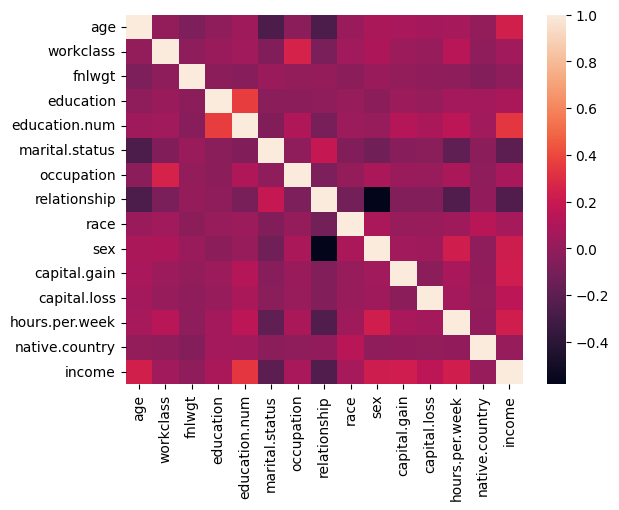

In [100]:
numerical_cols = df.select_dtypes(include=np.number).columns

correlation_matrix_numerical = df[numerical_cols].corr()

display(correlation_matrix_numerical)

categorical_cols = df.select_dtypes(include='object').columns

df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

correlation_matrix_encoded = df_encoded.corr()

# print("\nCorrelation matrix for all features after Label Encoding:")
sns.heatmap(correlation_matrix_encoded)

# print("\nCorrelation of features with 'income' after Label Encoding:")
# display(correlation_matrix_encoded['income'].sort_values(ascending=False))

In [101]:
df.drop(columns = ['workclass', 'education', 'occupation', 'race', 'native.country'], inplace = True)

In [102]:
df.head()

,age,fnlwgt,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,Widowed,Not-in-family,Female,0,4356,40,<=50K
1,82,132870,9,Widowed,Not-in-family,Female,0,4356,18,<=50K
2,66,186061,10,Widowed,Unmarried,Female,0,4356,40,<=50K
3,54,140359,4,Divorced,Unmarried,Female,0,3900,40,<=50K
4,41,264663,10,Separated,Own-child,Female,0,3900,40,<=50K


In [103]:
num_cols = df.select_dtypes(include = np.number).columns
scalar_encoders = []
for col in num_cols:
  scalar_encoders.append(StandardScaler())
  df[col] = scalar_encoders[-1].fit_transform(df[[col]])

In [104]:
df.head()

,age,fnlwgt,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,3.769612,-1.067997,-0.420060,Widowed,Not-in-family,Female,-0.14592,10.593507,-0.035429,<=50K
1,3.183112,-0.539169,-0.420060,Widowed,Not-in-family,Female,-0.14592,10.593507,-1.817204,<=50K
2,2.010110,-0.035220,-0.031360,Widowed,Unmarried,Female,-0.14592,10.593507,-0.035429,<=50K
3,1.130359,-0.468215,-2.363558,Divorced,Unmarried,Female,-0.14592,9.461864,-0.035429,<=50K
4,0.177296,0.709482,-0.031360,Separated,Own-child,Female,-0.14592,9.461864,-0.035429,<=50K


In [108]:
cat_cols = df.select_dtypes(include = 'object').columns
label_encoders = []
for col in cat_cols:
  label_encoders.append(LabelEncoder())
  df[col] = label_encoders[-1].fit_transform(df[col])

In [109]:
df.head()

,age,fnlwgt,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,3.769612,-1.067997,-0.420060,6,1,0,-0.14592,10.593507,-0.035429,0
1,3.183112,-0.539169,-0.420060,6,1,0,-0.14592,10.593507,-1.817204,0
2,2.010110,-0.035220,-0.031360,6,4,0,-0.14592,10.593507,-0.035429,0
3,1.130359,-0.468215,-2.363558,0,4,0,-0.14592,9.461864,-0.035429,0
4,0.177296,0.709482,-0.031360,5,3,0,-0.14592,9.461864,-0.035429,0


In [140]:
x = df.drop(columns = ['income'])
y = df['income']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size =0.8, random_state = 42)

In [142]:
x_train = torch.from_numpy(x_train.values).float()
x_test = torch.from_numpy(x_test.values).float()
y_train = torch.from_numpy(y_train.values).float()
y_test = torch.from_numpy(y_test.values).float()

In [143]:
model = MLP(learning_rate = 0.01, input_size = 9, hidden_size = 18, output_size = 1)
model.fit(x_train, y_train, epochs = 100)

Loss: 0/100 : 0.6493541598320007
Loss: 1/100 : 0.6282695531845093
Loss: 2/100 : 0.6053227782249451
Loss: 3/100 : 0.578130841255188
Loss: 4/100 : 0.5489245653152466
Loss: 5/100 : 0.5229844450950623
Loss: 6/100 : 0.508712887763977
Loss: 7/100 : 0.5076771974563599
Loss: 8/100 : 0.500777542591095
Loss: 9/100 : 0.4834762215614319
Loss: 10/100 : 0.4705762565135956
Loss: 11/100 : 0.4674644470214844
Loss: 12/100 : 0.45652055740356445
Loss: 13/100 : 0.4385887086391449
Loss: 14/100 : 0.4262617230415344
Loss: 15/100 : 0.4185946583747864
Loss: 16/100 : 0.4080398380756378
Loss: 17/100 : 0.39696237444877625
Loss: 18/100 : 0.3939475417137146
Loss: 19/100 : 0.39340734481811523
Loss: 20/100 : 0.38720178604125977
Loss: 21/100 : 0.38456010818481445
Loss: 22/100 : 0.38389918208122253
Loss: 23/100 : 0.3783743381500244
Loss: 24/100 : 0.37223726511001587
Loss: 25/100 : 0.369915246963501
Loss: 26/100 : 0.3645128011703491
Loss: 27/100 : 0.35891109704971313
Loss: 28/100 : 0.35694146156311035
Loss: 29/100 : 0.35

In [144]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.8502994011976048
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4976
         1.0       0.73      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513

